In [1]:
import os
def count_images(folder_path):
    image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp')
    return sum(1 for file in os.listdir(folder_path) if file.lower().endswith(image_extensions))

# Set your folder path
folder_path = '/home/bjangley/VPR/VPRMethods/sanity_check'
image_count = count_images(folder_path)
print(f'Total images: {image_count}')

Total images: 33


In [2]:


import os
import csv
from PIL import Image
# from PIL.ExifTags import TAGS, GPSTAGS

# def convert_to_decimal(degree_tuple):
#     degrees, minutes, seconds = degree_tuple
#     return degrees + (minutes / 60.0) + (seconds / 3600.0)

# def get_gps_data(exif_data):
#     gps_info = exif_data.get("GPSInfo")
#     if not gps_info:
#         return None, None, None
    
#     lat = lon = yaw = None
    
#     lat_ref = gps_info.get(1)
#     lat_data = gps_info.get(2)
#     if lat_ref and lat_data:
#         lat = convert_to_decimal(lat_data)
#         if lat_ref != 'N':
#             lat = -lat

#     lon_ref = gps_info.get(3)
#     lon_data = gps_info.get(4)
#     if lon_ref and lon_data:
#         lon = convert_to_decimal(lon_data)
#         if lon_ref != 'E':
#             lon = -lon
    
#     yaw = gps_info.get(17) or gps_info.get(24)
#     return lat, lon, yaw

# def extract_exif_to_csv(folder_path, csv_path):
#     # Define common image extensions
#     image_extensions = ('.jpg', '.jpeg', '.png', '.tiff', '.webp')

#     # Define CSV headers
#     fieldnames = ['id', 'image_name', 'captured_at', 'sequence', 'lat', 'long', 'orientation']
    
#     # Open CSV file for writing
#     with open(csv_path, mode='w', newline='') as file:
#         writer = csv.DictWriter(file, fieldnames=fieldnames)
#         writer.writeheader()

#         # Loop through images and collect EXIF data
#         for i, image_name in enumerate(os.listdir(folder_path), start=0):
#             if image_name.lower().endswith(image_extensions):
#                 image_path = os.path.join(folder_path, image_name)
                
#                 with Image.open(image_path) as img:
#                     exif_data = img._getexif()
#                     if exif_data:
#                         # Convert EXIF tag IDs to names
#                         exif = {TAGS.get(tag_id, tag_id): value for tag_id, value in exif_data.items()}
                        
#                         # Extract required EXIF info
#                         lat, lon, yaw = get_gps_data(exif)
#                         captured_at = exif.get("DateTimeOriginal")  # Date and time captured

#                         # Write the row to CSV
#                         writer.writerow({
#                             'id': i,
#                             'image_name': image_name,
#                             'captured_at': captured_at,
#                             'sequence': 'custom',  # Replace with sequence value if available
#                             'lat': lat,
#                             'long': lon,
#                             'orientation': yaw
#                         })
#                     else:
#                         print(f"No EXIF data for {image_name}")

# # Set the folder path and CSV output path
# csv_path = '/home/bjangley/VPR/VPRMethods/sanity_check/metadata.csv'
# extract_exif_to_csv(folder_path, csv_path)


In [3]:
import folium
from folium.plugins import MarkerCluster
from PIL import Image
import base64
import pandas as pd
import io
from io import BytesIO

def get_image_html(img_path, width=50):
    # Load and resize the image
    with Image.open(img_path) as img:
        img = img.rotate(-90, expand=True)
        img.thumbnail((width, width))
        # Convert the image to base64
        buffered = BytesIO()
        img.save(buffered, format="JPEG")
        img_str = base64.b64encode(buffered.getvalue()).decode('utf-8')
    return f'<img src="data:image/jpeg;base64,{img_str}" width="{width}" height="{width}">'

def plot_images_on_map(csv_path, image_folder, output_map='map.html'):
    # Load data from CSV
    data = pd.read_csv(csv_path)
    
    # Initialize the map centered on average coordinates
    avg_lat = data['lat'].mean()
    avg_lon = data['long'].mean()
    folium_map = folium.Map(location=[avg_lat, avg_lon], zoom_start=12)

    # Initialize a marker cluster
    # marker_cluster = MarkerCluster().add_to(folium_map)
    pin_locations= [[51.989927, 4.344669],
                [51.989922, 4.344427],
                [51.989927, 4.344298],
                [51.989958, 4.344230],
                [51.989907, 4.343185],
                [51.989899, 4.342976],
                [51.989871, 4.342486],
                [51.989947, 4.342472],
                [51.989795, 4.339715],
                [51.989742, 4.339439],
                [51.989834, 4.339524],
                [51.989679, 4.339546],
                ]


    # Add the custom pins to the map
    for index, location in enumerate(pin_locations):
        folium.Marker(
            location=location,
            popup=f'Index: {index}<br>Location: {location}',  # Customized popup with index
            tooltip=f'Pin {index}',  # Tooltip showing index on hover
            icon=folium.Icon(color='red', icon='info-sign')  # Red icon with an 'i' symbol
        ).add_to(folium_map)

        
    # Loop through each image data entry
    for _, row in data.iterrows():
        # Get the file path for the image
        image_path = os.path.join(image_folder, f"{row['image_name']}")
        lat, lon = row['lat'], row['long']
        image_id = row['id']
        image_name = row['image_name']
        orientation = row['orientation']
        # Create the HTML for the image
        image_html = get_image_html(image_path)

        icon_html = f"""
        <div style="
            position: relative;
            width: 30px;
            height: 30px;
            border-radius: 50%;
            text-align: center;
            line-height: 30px;
        ">
            <div style="
                transform: rotate({orientation}deg);
                position: absolute;
                top: 50%;
                left: 50%;
                transform-origin: center;
                font-size: 16px;
                font-weight: bold;
            ">
                &#x21E7;  <!-- Bold arrow -->
            </div>
        </div>
        """
        # # Add blue marker
        # folium.Marker(
        #     location=[lat, lon],
        #     popup=f"{image_html}<br>ImageIndex: {image_id}, Name: {image_name}",
        #     tooltip=f"ImageIndex: {image_id}",
        #     icon=folium.Icon(color='blue')
        # ).add_to(folium_map)
        # # Add marker with the rotating arrow and color intensity
        # folium.Marker(
        #     location=[lat, lon],
        #     popup=f"{image_html}<br>ImageIndex: {image_id}, Name: {image_name}",
        #     tooltip=f"ImageIndex: {image_id}",
        #     icon=folium.DivIcon(html=icon_html)
        # ).add_to(folium_map)

    # Save the map to an HTML file
    folium_map.save(output_map)
    print(f"Map saved as {output_map}")
    display(folium_map)



csv_path = '/home/bjangley/VPR/VPRMethods/sanity_check/metadata.csv'
# Plot images on the map
plot_images_on_map(csv_path, folder_path)


Map saved as map.html


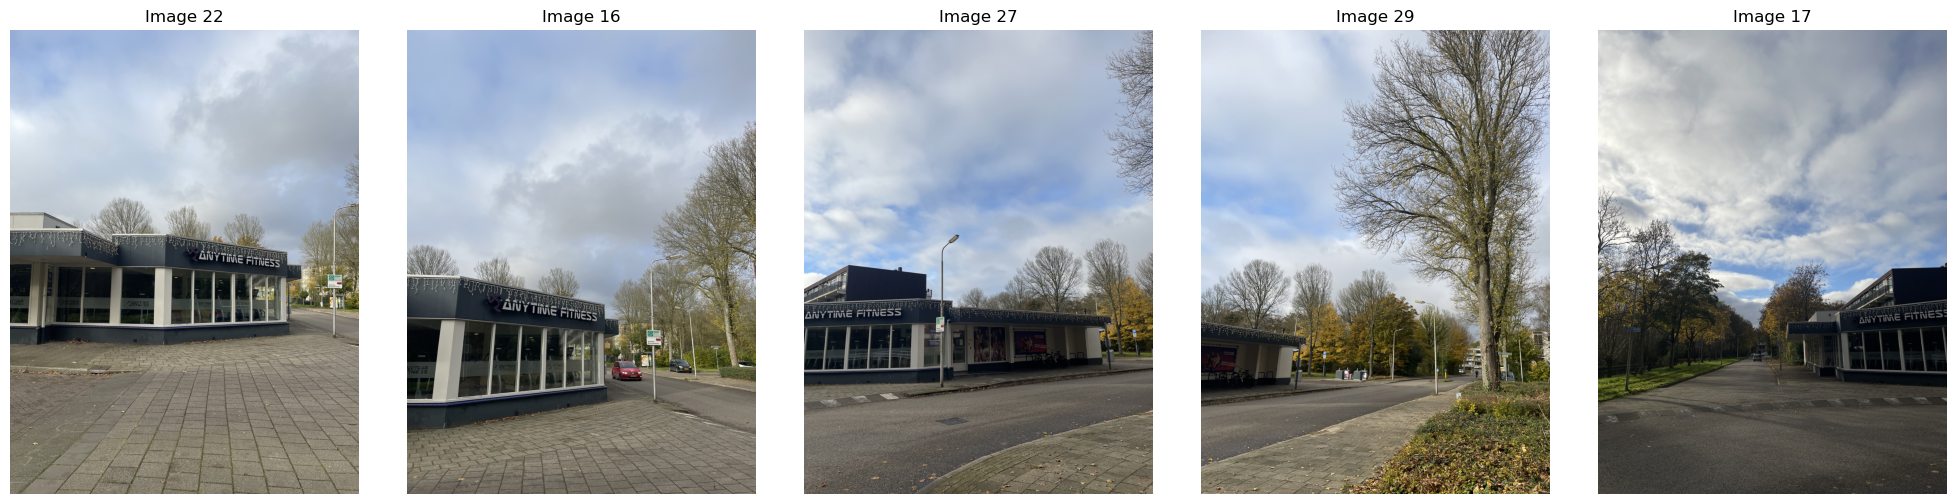

In [4]:
import matplotlib.pyplot as plt
import csv

pin_locations = [[51.989927, 4.344669],
                [51.989922, 4.344427],
                [51.989927, 4.344298],
                [51.989958, 4.344230],
                [51.989907, 4.343185],
                [51.989899, 4.342976],
                [51.989871, 4.342486],
                [51.989947, 4.342472],
                [51.989795, 4.339715],
                [51.989742, 4.339439],
                [51.989834, 4.339524],
                [51.989679, 4.339546],
                ]

image_to_pin = [  0,  3,  2,  1,  2,
                  0,  2,  2,  3,  0,
                  4,100,  8,100,  9, #14
                100,100,  8,100, 11, #19
                  9,100, 11,100, 11, #24
                 11,  6,  8, 8, 100, #29
                100,  1,  1 
                ]


images_ex1 = [22,16,27,29,17]
images_ex2 = [19,14,18]
images_ex3 =[26,20,30]
images_ex4 =[10,30,31]
images_ex5 =[31,21,15]
images_ex6 = [8,7,1,6]


def getImageFromIndex(index, image_folder):
    filename = image_folder + '/metadata.csv'
    with open(filename, 'r', newline='') as csvfile:
        csvreader = csv.DictReader(csvfile)
        
        for row in csvreader:
            if row['id'] == str(index):
                image_path = os.path.join(image_folder, row['image_name'])
                return row, image_path
        
        return None  # ID not found


def plotImages(image_indices,image_folder, title=None):
    # Get image paths
    image_paths = [getImageFromIndex(index, image_folder)[1] for index in image_indices]
    
    # Open images
    images = [Image.open(path) for path in image_paths]
    
    # Create figure
    fig, axes = plt.subplots(1, len(images), figsize=(20, 5))
    if len(images) == 1:
        axes = [axes]
    
    # Plot images
    for ax, img, index in zip(axes, images, image_indices):
        img = img.rotate(-90, expand=True)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f'Image {index}')
    
    # Set main title if provided
    if title:
        fig.suptitle(title, fontsize=16)
    
    plt.tight_layout()
    plt.show()

plotImages(images_ex1, folder_path)

>> Loading a list of 2 images
 - adding /home/bjangley/VPR/mast3r/sanity_check/known.png with resolution 3024x4032 --> 384x512
 - adding /home/bjangley/VPR/mast3r/sanity_check/unknown.png with resolution 3024x4032 --> 384x512
 (Found 2 images)
Images shape:  [[512 384]]
Mast3r Inference Time: 0.2060 seconds.
Point Matches Time: 0.1383 seconds.
Number of matches:  303


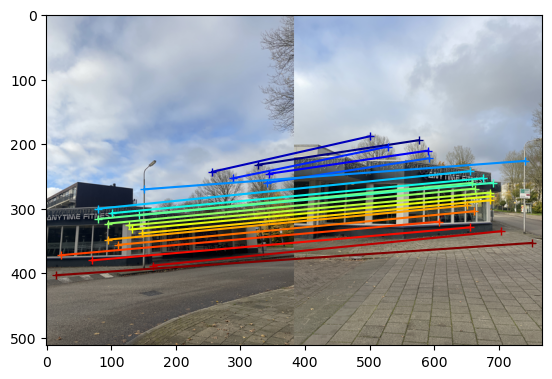

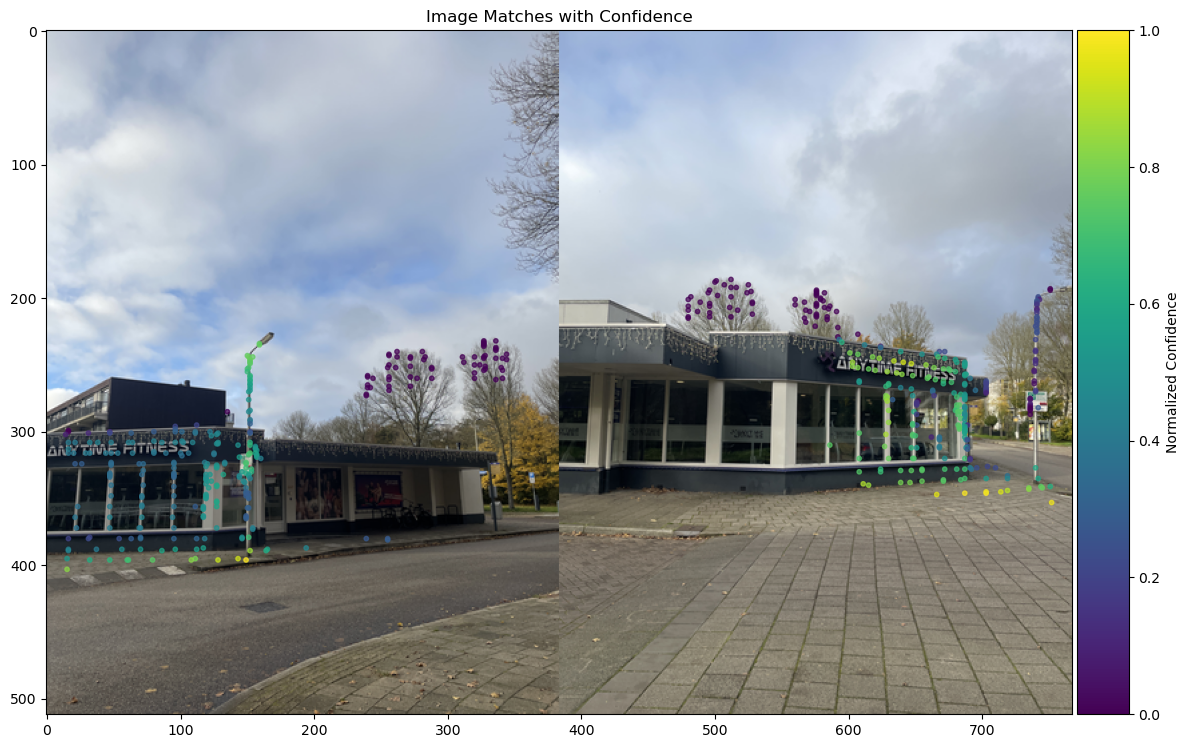

Number of matches after filtering via confidence mask:  256
(256, 3) shape
Predicted Translation:  [-13.22581011   1.71993404   6.03646259]
Translation Magnitude: 14.639641616884534
[51.989795, 4.339715]
301.5456847847263
world frame translation:  [-12.06387014  -8.11319732  -1.71993404]
Estimated new position: Lat 51.98972407236682, Lon 4.3395371830480025 



In [16]:
# known_image_path = '/home/bjangley/VPR/mast3r/utrecht/IMG_1539_converted.png'
# unknown_image_path = '/home/bjangley/VPR/mast3r/utrecht/799338198457726_converted.png'
known_image_size = [4032, 3024]
master_size = [512,384]

"""Getting mast3r output"""


from mast3r.model import AsymmetricMASt3R
from mast3r.fast_nn import fast_reciprocal_NNs
import mast3r.utils.path_to_dust3r
from dust3r.inference import inference
from dust3r.utils.image import load_images

#imports for visualizing matches
import numpy as np
import torch
import torchvision.transforms.functional
from matplotlib import pyplot as pl
from mpl_toolkits.axes_grid1 import make_axes_locatable

import cv2 #for pnp
from pyproj import Proj, transform #cartographic transformations and coordinate conversions

#supressing unnecessary warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


import time

# start_time = time.time()
# # Your code block here
# end_time = time.time()
# execution_time = end_time - start_time
# print(f"Execution time: {execution_time:.4f} seconds")

#ensuring i dont exceed cpu limits?
import os
os.environ["MKL_NUM_THREADS"] = "8"
os.environ["NUMEXPR_NUM_THREADS"] = "8"
os.environ["OMP_NUM_THREADS"] = "8"

device = 'cuda:5'
schedule = 'cosine'
lr = 0.01
niter = 300
boarder = 3




def min_max_normalize(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))


def getMasterOutout(known_image, unknown_image, visualizeMatches=False): 
    #inputs known image and unknown image paths to return mast3r output

    model_name = "naver/MASt3R_ViTLarge_BaseDecoder_512_catmlpdpt_metric"
    # you can put the path to a local checkpoint in model_name if needed
    ##load model and run inference
    model = AsymmetricMASt3R.from_pretrained(model_name).to(device)
    images = load_images([known_image, unknown_image], size=512)
    print("Images shape: ",images[0]['true_shape'])
    mast3r_inference_start = time.time()
    output = inference([tuple(images)], model, device, batch_size=1, verbose=False)
    mast3r_inference_stop = time.time()
    mast3r_inference_time = mast3r_inference_stop-mast3r_inference_start
    print(f"Mast3r Inference Time: {mast3r_inference_time:.4f} seconds.")
    # at this stage, you have the raw dust3r predictions 
    #dust3r predictions are the original two heads outputing 3d point cloud and confidence
    #master adds another that includes an additional head for local features


    view1 = output['view1'] #some form of the image to size of the point cloud -- used to get the size of the matches 
    view2 = output['view2'] 

    pred1 = output['pred1'] #3d point cloud 
    pred2 = output['pred2']

    desc1 = pred1['desc'].squeeze(0).detach() #local features
    desc2 = pred2['desc'].squeeze(0).detach()



    # find 2D-2D matches between the two images
    #feature based mapping to recover point correspdances/matches
    point_matches_start=time.time()
    matches_im0, matches_im1 = fast_reciprocal_NNs(desc1, desc2, subsample_or_initxy1=8,
                                                    device=device, dist='dot', block_size=2**13)
    point_matches_stop = time.time()
    point_matches_time = point_matches_stop-point_matches_start
    print(f"Point Matches Time: {point_matches_time:.4f} seconds.")
    

    ignore = 0 #to ignore correspondances in the lower half of the image
    # ignore small border around the edge
    H0, W0 = view1['true_shape'][0]
    valid_matches_im0 = (matches_im0[:, 0] >= boarder) & (matches_im0[:, 0] < int(W0) - boarder) & (
        matches_im0[:, 1] >= boarder) & (matches_im0[:, 1] < int(H0) - boarder -ignore)

    H1, W1 = view2['true_shape'][0]
    valid_matches_im1 = (matches_im1[:, 0] >= boarder) & (matches_im1[:, 0] < int(W1) - boarder) & (
        matches_im1[:, 1] >= boarder) & (matches_im1[:, 1] < int(H1) - boarder -ignore)

    valid_matches = valid_matches_im0 & valid_matches_im1

    # matches are Nx2 image coordinates.
    matches_im0 = matches_im0[valid_matches]
    matches_im1 = matches_im1[valid_matches]

    # Convert the other outputs to numpy arrays
    #point correspondances with respect to the coordinate system of the first image 
    pts3d_im0 = pred1['pts3d'].squeeze(0).detach().cpu().numpy() 
    pts3d_im1 = pred2['pts3d_in_other_view'].squeeze(0).detach().cpu().numpy() 



    conf_im0 = pred1['conf'].squeeze(0).detach().cpu().numpy() #confidence 
    conf_im1 = pred2['conf'].squeeze(0).detach().cpu().numpy()

    desc_conf_im0 = pred1['desc_conf'].squeeze(0).detach().cpu().numpy()
    desc_conf_im1 = pred2['desc_conf'].squeeze(0).detach().cpu().numpy()
    

    
    #print("Conf: ",np.max(conf_im0), np.min(conf_im0))


    # normalized_conf_im0 = conf_im0/np.linalg.norm(conf_im0) #normalized confidence scores
    # normalized_conf_im1 = conf_im1/np.linalg.norm(conf_im1)

    normalized_conf_im0 = min_max_normalize(conf_im0)
    normalized_conf_im1 = min_max_normalize(conf_im1)


    #print("Normalization: ", np.max(normalized_conf_im1), np.min(normalized_conf_im1))




    if visualizeMatches:
        # visualize a few matches
        n_viz = 20
        num_matches = matches_im0.shape[0]
        print("Number of matches: ",num_matches)
        match_idx_to_viz = np.round(np.linspace(0, num_matches - 1, n_viz)).astype(int)
        viz_matches_im0, viz_matches_im1 = matches_im0[match_idx_to_viz], matches_im1[match_idx_to_viz]

        image_mean = torch.as_tensor([0.5, 0.5, 0.5], device='cpu').reshape(1, 3, 1, 1)
        image_std = torch.as_tensor([0.5, 0.5, 0.5], device='cpu').reshape(1, 3, 1, 1)

        viz_imgs = []
        for i, view in enumerate([view1, view2]):
            rgb_tensor = view['img'] * image_std + image_mean
            viz_imgs.append(rgb_tensor.squeeze(0).permute(1, 2, 0).cpu().numpy())

        H0, W0, H1, W1 = *viz_imgs[0].shape[:2], *viz_imgs[1].shape[:2]
        img0 = np.pad(viz_imgs[0], ((0, max(H1 - H0, 0)), (0, 0), (0, 0)), 'constant', constant_values=0)
        img1 = np.pad(viz_imgs[1], ((0, max(H0 - H1, 0)), (0, 0), (0, 0)), 'constant', constant_values=0)
        img = np.concatenate((img0, img1), axis=1)
        pl.figure()
        pl.imshow(img)
        cmap = pl.get_cmap('jet')
        for i in range(n_viz):
            (x0, y0), (x1, y1) = viz_matches_im0[i].T, viz_matches_im1[i].T
            pl.plot([x0, x1 + W0], [y0, y1], '-+', color=cmap(i / (n_viz - 1)), scalex=False, scaley=False)
        pl.show(block=True)

        # Create the figure
        fig, ax = plt.subplots(figsize=(12, 8))

        # Plot the image
        im = ax.imshow(img)
        ax.set_title('Image Matches with Confidence')

        # Create scatter plots of matches with color-coded confidence
        scatter_im0 = ax.scatter(matches_im0[:, 0], matches_im0[:, 1], 
                                c=normalized_conf_im0[matches_im0[:, 1], matches_im0[:, 0]], 
                                cmap='viridis', s=10, alpha=0.7)
        scatter_im1 = ax.scatter(matches_im1[:, 0] + W0, matches_im1[:, 1], 
                                c=normalized_conf_im1[matches_im1[:, 1], matches_im1[:, 0]], 
                                cmap='viridis', s=10, alpha=0.7)

        # Create a divider for the existing axes instance
        divider = make_axes_locatable(ax)

        # Add an axes to the right of the main axes
        cax = divider.append_axes("right", size="5%", pad=0.05)

        # Create colorbar with the same height as the image
        plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(vmin=0, vmax=1), cmap='viridis'), 
             cax=cax, label='Normalized Confidence')

        plt.tight_layout()
        plt.show()

    # Create a mask for matches with confidence > threshold
    threshold = 0
    conf_mask = (normalized_conf_im0[matches_im0[:, 1], matches_im0[:, 0]] > threshold) & \
                (normalized_conf_im1[matches_im1[:, 1], matches_im1[:, 0]] > threshold)
    
    # Apply the mask to filter matches and other data
    matches_im0 = matches_im0[conf_mask] #query
    matches_im1 = matches_im1[conf_mask] #map
    print("Number of matches after filtering via confidence mask: ", matches_im0.shape[0])
    
    return matches_im0, matches_im1, pts3d_im0, pts3d_im1, conf_im0, conf_im1, desc_conf_im0, desc_conf_im1


def scale_intrinsics(K: np.ndarray, prev_w: float, prev_h: float, master_w: float, master_h: float) -> np.ndarray:
    """Scale the intrinsics matrix by a given factor .

    Args:
        K (NDArray): 3x3 intrinsics matrix
        scale (float): Scale factor

    Returns:
        NDArray: Scaled intrinsics matrix
    """
    #540 x 960 --> 288 x 512

    assert K.shape == (3, 3), f"Expected (3, 3), but got {K.shape=}"

    scale_w = master_w / prev_w  # sizes of the images in the Mast3r dataset
    scale_h = master_h / prev_h  # sizes of the images in the Mast3r dataset

    K_scaled = K.copy()
    K_scaled[0, 0] *= scale_w
    K_scaled[0, 2] *= scale_w
    K_scaled[1, 1] *= scale_h
    K_scaled[1, 2] *= scale_h

    return K_scaled

def CameraMatrix(fx,fy,cx,cy):
    return np.array([[fx,  0, cx],
                     [ 0, fy, cy],
                     [ 0,  0, 1]])

def run_pnp(pts2D, pts3D, K): 
    """
    intrinsics= K

    mode='cv2'
    """
    print(pts3D.shape,"shape")
    success, r_pose, t_pose, _ = cv2.solvePnPRansac(pts3D, pts2D, K, None, flags=cv2.SOLVEPNP_SQPNP,
                                                    iterationsCount=10_000,
                                                    reprojectionError=3,
                                                    confidence=0.9999) #returns 3d to 2d transfromation, known to unknown 
    if not success:
        print("Failed to find transform")
        return False, None
    r_pose = cv2.Rodrigues(r_pose)[0]  # world2cam == world2cam2
    RT = np.r_[np.c_[r_pose, t_pose], [(0,0,0,1)]] # world2cam2 
    
    return True, np.linalg.inv(RT)  # cam2toworld

def get_rotation_from_compass(compass_angle):
    """ Create a rotation matrix based on compass angle (in radians). """
    return np.array([
        [np.cos(compass_angle), -np.sin(compass_angle), 0],
        [np.sin(compass_angle), np.cos(compass_angle), 0],
        [0, 0, 1]
    ])

def pnp_to_relative_global_coords(pnp_rotation, pnp_translation, ref_lat, ref_lon, compass_angle, ref_alt=0):
    # Define the reference point in UTM coordinates
    utm_proj = Proj(proj='utm', zone=get_utm_zone(ref_lon), ellps='WGS84') 
    ref_x, ref_y = utm_proj(ref_lon, ref_lat)

    # Convert the rotation matrix to a 3x3 matrix if it's a vector
    if pnp_rotation.shape == (3,):
        R, _ = cv2.Rodrigues(pnp_rotation)
    else:
        R = pnp_rotation

    #print("Rotation: ", R, " Translation: ", pnp_translation )

    # The transformation we have is from known to unknown camera 
    compass_rotation = get_rotation_from_compass(-np.deg2rad(compass_angle))

    R_cam_to_world = np.array([[1, 0, 0],
                               [0, 0, 1],
                               [0, -1, 0]])

    unknown_camera_in_known_frame = R_cam_to_world  @ pnp_translation
    
    #print("1: ",unknown_camera_in_known_frame)
    unknown_camera_position = (compass_rotation) @ unknown_camera_in_known_frame

    print("world frame translation: ",unknown_camera_position)
    # Add this position to the reference UTM coordinates
    new_x = ref_x + unknown_camera_position[0]
    new_y = ref_y + unknown_camera_position[1]
    global_alt = ref_alt + unknown_camera_position[2]

    # Transform back to latitude and longitude
    global_lon, global_lat = utm_proj(new_x, new_y, inverse=True)


    return global_lat, global_lon, global_alt

def get_utm_zone(longitude):
    return int((longitude + 180) / 6) + 1



images_to_correct = [images_ex1]
corrected_data=[]
for row in images_to_correct:
    known_image_dict, known_image_path_og = getImageFromIndex(row[2],folder_path)
    unknown_image_dict, unknown_image_path_og = getImageFromIndex(row[0],folder_path)


    known_image = Image.open(known_image_path_og)
    known_image = known_image.rotate(-90, expand=True)
    known_image_size = known_image.size  #original size of image
    #print(known_image.size)

    if known_image_dict['id'] == '53':
        print("flag")
        known_image = known_image.rotate(-90, expand=True) 

    unknown_image = Image.open(unknown_image_path_og)
    unknown_image = unknown_image.rotate(-90, expand=True)

    master_size = [384, 512] #size of images according to master? recovered from load_images in getMast3rOutput
    #Fixme: I need to make this dynamic
    
    
    known_image_path = '/home/bjangley/VPR/mast3r/sanity_check/known.png'
    unknown_image_path = '/home/bjangley/VPR/mast3r/sanity_check/unknown.png'

    known_image.save(known_image_path, format='PNG')
    unknown_image.save(unknown_image_path, format='PNG')

    # Example usage
    matches_im0, matches_im1, pts3d_im0, pts3d_im1, conf_im0, conf_im1, desc_conf_im0, desc_conf_im1 = getMasterOutout(known_image_path, unknown_image_path, visualizeMatches=True)


    K = CameraMatrix(2912.65,2909.73,2016,1512) #iphone12 estimated (wide)
    K_scaled = scale_intrinsics(K,known_image_size[0], known_image_size[1],master_size[0],master_size[1])

    # Predicted Transform copied from visloc.py
    ret_val, transformation = run_pnp(matches_im1.astype(np.float32), pts3d_im0[matches_im0[:, 1], matches_im0[:, 0], :], K_scaled.astype(np.float32))

    if ret_val: 
        #print("Predicted Transform:\n", transformation)
        pnp_rotation = transformation[:3, :3]  
        pnp_translation = transformation[:3, 3] 
        print("Predicted Translation: ",pnp_translation)
        
        # Calculate and print the magnitude of the translation
        translation_magnitude = np.linalg.norm(pnp_translation)
        print("Translation Magnitude:", translation_magnitude)
        # ref_lat = float(known_image_dict['lat'])
        # ref_lon = float(known_image_dict['long'])
        pin_id = image_to_pin[int(known_image_dict['id'])]
        if pin_id ==100:
            ref_location = [float(known_image_dict['lat']),float(known_image_dict['long'])]
        else:
            ref_location = pin_locations[pin_id]

        print(ref_location)
        ref_lat = ref_location[0]
        ref_lon = ref_location[1]
        print(float(known_image_dict['orientation']))
        new_lat, new_lon, _ = pnp_to_relative_global_coords(pnp_rotation, 1*pnp_translation, ref_lat, ref_lon, float(known_image_dict['orientation']))
        print(f"Estimated new position: Lat {new_lat}, Lon {new_lon} \n")
        corrected_data.append([new_lat, new_lon])


    





Anchor Location:  [51.989795, 4.339715]
Query GPS location:  51.98966111111111 4.339525
Corrected Location:  51.98972407236682 4.3395371830480025



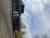
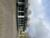
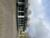

In [17]:
# Initialize the map
map_center = ref_location
mymap = folium.Map(location=map_center)


i=0
known_html = get_image_html(known_image_path)
unknown_html = get_image_html(unknown_image_path)



# Add marker for known image
print("Anchor Location: ", ref_location)
print("Query GPS location: ",float(unknown_image_dict['lat']), float(unknown_image_dict['long']))
print("Corrected Location: ", corrected_data[i][0], corrected_data[i][1]    )
folium.Marker(
    # location=[float(known_image_dict['lat']), float(known_image_dict['long'])],
    location = ref_location,
    popup=folium.Popup(known_html, max_width=300),
    icon=folium.Icon(color='blue', icon='info-sign'),
    tooltip="Known Image"
).add_to(mymap)

# Add marker for unknown image

folium.Marker(
    location=[float(unknown_image_dict['lat']), float(unknown_image_dict['long'])],
    popup=folium.Popup(unknown_html, max_width=300),
    icon=folium.Icon(color='red', icon='question-sign'),
    tooltip="Unknown Image -- Original"
).add_to(mymap)

# Add marker for unknown image

folium.Marker(
    location=[corrected_data[i][0], corrected_data[i][1]],
    popup=folium.Popup(unknown_html, max_width=300),
    icon=folium.Icon(color='green', icon='question-sign'),
    
    tooltip="Unknown Image -- Corrected"
).add_to(mymap)

display(mymap)





In [7]:
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots

# # Create the figure with two 3D subplots
# fig = make_subplots(
#     rows=1, cols=2,
#     specs=[[{'type': 'scene'}, {'type': 'scene'}]],
#     subplot_titles=('MASt3R 3D Points', 'Intrinsics-derived 3D Points')
# )


# # MASt3R points
# fig.add_trace(go.Scatter3d(
#     x=anchor_3d[:, 0],
#     y=anchor_3d[:, 1],
#     z=anchor_3d[:, 2],
#     mode='markers',
#     marker=dict(size=3, color='blue', opacity=0.6),
#     name='MASt3R'
# ), row=1, col=1)

# # fig.add_trace(go.Scatter3d(
# #     x=scale*anchor_3d_from_intrinsics[:, 0],
# #     y=scale*anchor_3d_from_intrinsics[:, 1],
# #     z=scale*anchor_3d_from_intrinsics[:, 2],
# #     mode='markers',
# #     marker=dict(size=3, color='red', opacity=0.6),
# #     name='Scaled Projected'
# # ), row=1, col=1)



# # Intrinsics-derived points
# fig.add_trace(go.Scatter3d(
#     x=anchor_3d_from_intrinsics[:, 0],
#     y=anchor_3d_from_intrinsics[:, 1],
#     z=anchor_3d_from_intrinsics[:, 2],
#     mode='markers',
#     marker=dict(size=3, color='red', opacity=0.6),
#     name='Intrinsics-derived'
# ), row=1, col=2)

# # Update layout
# fig.update_layout(height=600, width=1200, title_text="3D Point Clouds")

# # Show the plot
# fig.show()

In [8]:
# # Create the figure with two 3D subplots


# known_image = Image.open('/home/bjangley/VPR/mast3r/sanity_check/known.png')
# known_image = known_image.resize((384, 512))
# known_image = known_image.rotate(-90, expand=True)


# # Convert image to numpy array
# image_array = np.array(known_image)

# # Create the figure with one 3D subplot
# fig = make_subplots(
#     rows=1, cols=1,
#     specs=[[{'type': 'scene'}]],
#     subplot_titles=('MASt3R 3D Points')
# )



# print(pts3d_im0.shape)
# fig = make_subplots(
#     rows=1, cols=1,
#     specs=[[{'type': 'scene'}]],
#     subplot_titles=('MASt3R 3D Points', 'Intrinsics-derived 3D Points')
# )

# image_flattened = image_array.reshape(-1, 3)
# pts3d_reshaped = pts3d_im0.reshape(-1, 3)
# ones = np.ones(pts3d_reshaped[:,0].shape)
# # MASt3R points
# fig.add_trace(go.Scatter3d(
#     x=pts3d_reshaped[:,0],
#     y=pts3d_reshaped[:,1],
#     z=pts3d_reshaped[:,2],
#     #z = ones,
#     mode='markers',
#     marker=dict(size=1, color=[f'rgba({r}, {g}, {b}, 0.7)' for r, g, b in image_flattened]),
#     name='MASt3R'
# ), row=1, col=1)



# # Update layout
# fig.update_layout(height=600, width=1200, title_text="3D Point Clouds")

# # Show the plot
# fig.show()

In [13]:
print(K_scaled)

[[369.86031746   0.         256.        ]
 [  0.         369.48952381 192.        ]
 [  0.           0.           1.        ]]


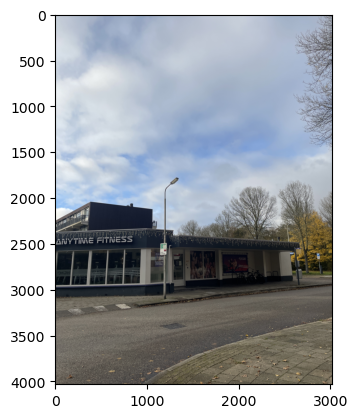

In [18]:
plt.imshow(known_image)